In [770]:
# Nicholas Chow
# Helmut Strey
# BME 574
# HW - PCA 2D Gaussian

In [771]:
import Pkg
Pkg.activate(".")

  Activating project at `C:\Users\nicky\Documents\BME 574`


In [772]:
Pkg.add(["Random","LinearAlgebra","Plots","Distributions"])

   Resolving package versions...
  No Changes to `C:\Users\nicky\Documents\BME 574\Project.toml`
  No Changes to `C:\Users\nicky\Documents\BME 574\Manifest.toml`


In [773]:
using Random, LinearAlgebra, Plots, Distributions

In [774]:
# generate normal (Gaussian) distribution between 0 and 1
nd = Normal(0,1)

Normal{Float64}(μ=0.0, σ=1.0)

In [775]:
# generate random data set of 1000 x and y coordinates
data = rand(nd,1000,2)

1000×2 Matrix{Float64}:
 -0.421222    0.100729
  0.545339   -0.101614
 -1.44288     0.423981
 -0.611398   -0.669666
 -0.161663   -0.0274118
 -0.069752   -0.560709
  0.276025   -0.0655042
 -0.0703244  -0.63341
 -0.496818   -0.198125
  0.306075    1.67328
  0.658213    0.835266
  1.60626     0.882573
 -0.531269   -0.45162
  ⋮          
 -0.0440092  -1.66826
  0.381374    0.901519
 -0.281345    0.965064
  0.141886    0.726703
 -0.0342417   1.49642
 -0.0584725   0.433039
  0.441152   -3.34915
  1.08053     0.670683
  0.863227    2.49372
  1.42002    -0.378338
 -0.499138   -0.579889
  0.239383   -2.97174

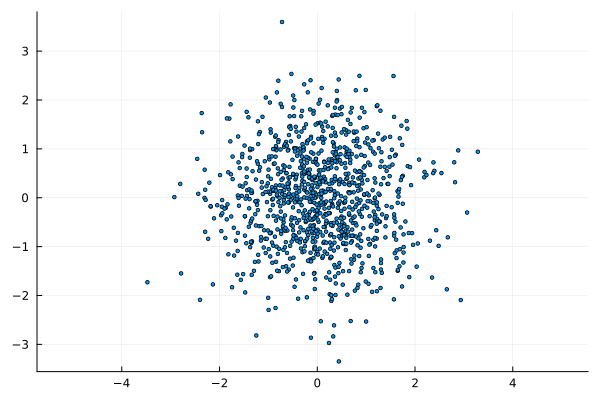

In [776]:
# plot the data
scatter(data[:,1],data[:,2], legend = nothing, aspect_ratio = :equal, ms = 2)

In [777]:
# stretch the data along the y axis by a factor of 3
data_s = copy(data)
data_s[:,2] = data_s[:,2]*3

1000-element Vector{Float64}:
   0.30218612970215825
  -0.3048414787084699
   1.2719439094931642
  -2.0089977171620257
  -0.08223529368904095
  -1.6821282674195874
  -0.1965126078201639
  -1.9002308029881434
  -0.5943755014964103
   5.019849339154385
   2.5057970675542447
   2.6477185811522967
  -1.3548585054088529
   ⋮
  -5.004772810080054
   2.704558369031049
   2.8951909983195137
   2.1801086815261614
   4.489258091191317
   1.2991160192521878
 -10.047439938976325
   2.012047932367065
   7.481163209133738
  -1.135014169575021
  -1.739667943546169
  -8.915214882155059

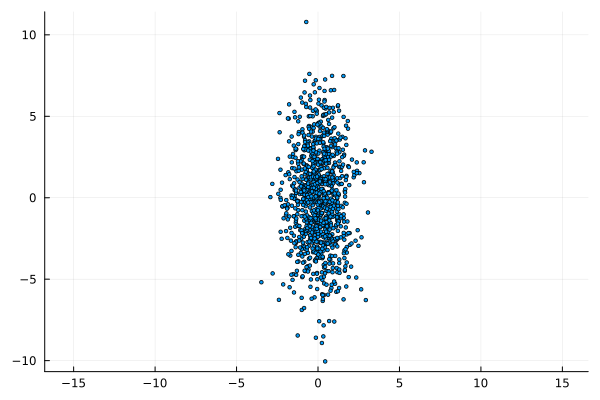

In [778]:
# plot the data
scatter(data_s[:,1], data_s[:,2], legend = nothing, aspect_ratio = :equal, ms = 2)

In [851]:
# generate a rotation matrix by pi/4 (45 deg)
theta = pi/4
r = [cos(theta) sin(theta); -sin(theta) cos(theta)]

2×2 Matrix{Float64}:
  0.707107  0.707107
 -0.707107  0.707107

In [853]:
# rotate the stretched data
data_r = data_s * r

1000×2 Matrix{Float64}:
 -0.511527   -0.0841708
  0.601168    0.170057
 -1.91967    -0.120868
  0.988252   -1.8529
 -0.0561639  -0.172462
  1.14012    -1.23877
  0.334135    0.056224
  1.29394    -1.39339
  0.0689837  -0.77159
 -3.33314     3.766
 -1.30644     2.23729
 -0.736423    3.00802
  0.582365   -1.33369
  ⋮          
  3.50779    -3.57003
 -1.64274     2.18208
 -2.24615     1.84827
 -1.44124     1.6419
 -3.1986      3.15017
 -0.95996     0.877267
  7.41655    -6.79267
 -0.658679    2.18679
 -4.67959     5.90038
  1.80668     0.201532
  0.877187   -1.58308
  6.47328    -6.13474

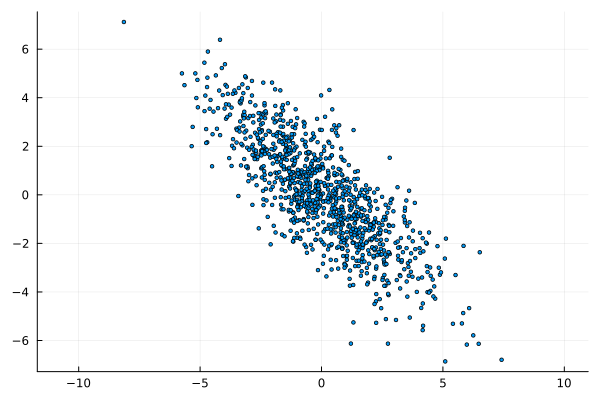

In [855]:
# plot the data
scatter(data_r[:,1], data_r[:,2], legend = nothing, aspect_ratio = :equal, ms = 2)

In [857]:
# translate the rotated by delta_x = 1 and delta_y = 1
delta_x = 1
delta_y = 1

data_t = [data_r[:,1] .+ delta_x data_r[:,2] .+ delta_y]

# could be written as data_t = data_r .+ 1, but i wanted to include edge case if delta_x does not equal delta_y

1000×2 Matrix{Float64}:
  0.488473   0.915829
  1.60117    1.17006
 -0.919669   0.879132
  1.98825   -0.8529
  0.943836   0.827538
  2.14012   -0.238766
  1.33413    1.05622
  2.29394   -0.393393
  1.06898    0.22841
 -2.33314    4.766
 -0.306439   3.23729
  0.263577   4.00802
  1.58237   -0.333694
  ⋮         
  4.50779   -2.57003
 -0.64274    3.18208
 -1.24615    2.84827
 -0.441241   2.6419
 -2.1986     4.15017
  0.04004    1.87727
  8.41655   -5.79267
  0.341321   3.18679
 -3.67959    6.90038
  2.80668    1.20153
  1.87719   -0.583075
  7.47328   -5.13474

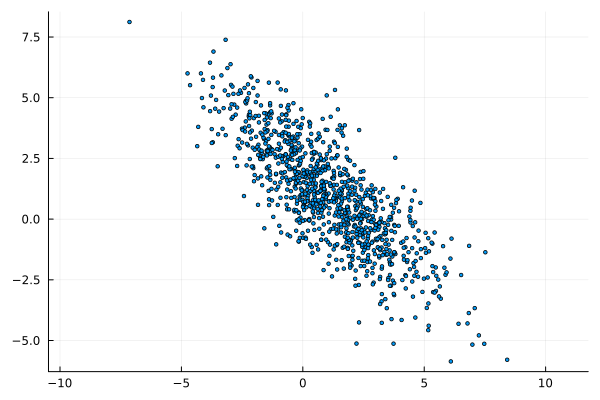

In [859]:
# plot the data
scatter(data_t[:,1], data_t[:,2], legend = nothing, aspect_ratio = :equal, ms = 2)

In [860]:
X = copy(data_t)

1000×2 Matrix{Float64}:
  0.488473   0.915829
  1.60117    1.17006
 -0.919669   0.879132
  1.98825   -0.8529
  0.943836   0.827538
  2.14012   -0.238766
  1.33413    1.05622
  2.29394   -0.393393
  1.06898    0.22841
 -2.33314    4.766
 -0.306439   3.23729
  0.263577   4.00802
  1.58237   -0.333694
  ⋮         
  4.50779   -2.57003
 -0.64274    3.18208
 -1.24615    2.84827
 -0.441241   2.6419
 -2.1986     4.15017
  0.04004    1.87727
  8.41655   -5.79267
  0.341321   3.18679
 -3.67959    6.90038
  2.80668    1.20153
  1.87719   -0.583075
  7.47328   -5.13474

In [863]:
# compute mean of each column
X_mean = mean(X, dims = 1)

1×2 Matrix{Float64}:
 1.01258  1.02431

In [864]:
# subtract mean to find mean centered data
B = X - ones(1000,1)*X_mean

1000×2 Matrix{Float64}:
 -0.524104   -0.10848
  0.588591    0.145748
 -1.93225    -0.145177
  0.975675   -1.87721
 -0.0687415  -0.196771
  1.12754    -1.26308
  0.321557    0.0319151
  1.28136    -1.4177
  0.0564061  -0.795899
 -3.34572     3.74169
 -1.31902     2.21298
 -0.749001    2.98371
  0.569788   -1.358
  ⋮          
  3.49521    -3.59434
 -1.65532     2.15777
 -2.25873     1.82396
 -1.45382     1.61759
 -3.21117     3.12586
 -0.972538    0.852959
  7.40398    -6.81698
 -0.671257    2.16248
 -4.69216     5.87607
  1.79411     0.177223
  0.864609   -1.60738
  6.4607     -6.15905

In [865]:
# compute SVD
u,s,v = svd(B/sqrt(1000))

SVD{Float64, Float64, Matrix{Float64}, Vector{Float64}}
U factor:
1000×2 Matrix{Float64}:
 -0.00315889    0.0142126
  0.00336803   -0.0165033
 -0.0135581     0.0466271
  0.0214854     0.0206432
  0.000955726   0.00599948
  0.0180274     0.00332422
  0.00219809   -0.0079352
  0.0203539     0.00337719
  0.00640109    0.0167653
 -0.0534455    -0.00972368
 -0.0266082    -0.0205491
 -0.0280717    -0.050794
  0.0145117     0.0179846
  ⋮            
  0.0534728     0.0030326
 -0.0287433    -0.0117555
 -0.0308121     0.00934069
 -0.0231615    -0.00403743
 -0.0478036     0.0012096
 -0.0137742     0.00248997
  0.107291     -0.0116307
 -0.0213187    -0.0339335
 -0.0796717    -0.0278768
  0.0122704    -0.0442548
  0.0186183     0.0170216
  0.0952023    -0.0053789
singular values:
2-element Vector{Float64}:
 2.9643859104123718
 0.9919639643333942
Vt factor:
2×2 Matrix{Float64}:
  0.71063   -0.703566
 -0.703566  -0.71063

In [866]:
# determine ellipse containing 1 standard deviation
phi = (0.001:0.001:1)*pi*2
X_std = [cos.(phi) sin.(phi)]*Diagonal(s)*v'


1000×2 Matrix{Float64}:
 2.10215  -2.09003
 2.09764  -2.09434
 2.09305  -2.09856
 2.08838  -2.1027
 2.08362  -2.10675
 2.07878  -2.11073
 2.07386  -2.11462
 2.06885  -2.11843
 2.06377  -2.12215
 2.0586   -2.12579
 2.05335  -2.12934
 2.04802  -2.13282
 2.04261  -2.1362
 ⋮        
 2.14975  -2.03198
 2.14625  -2.03726
 2.14266  -2.04247
 2.13899  -2.04759
 2.13523  -2.05263
 2.13139  -2.05759
 2.12746  -2.06247
 2.12345  -2.06727
 2.11936  -2.07198
 2.11518  -2.07662
 2.11092  -2.08117
 2.10658  -2.08564

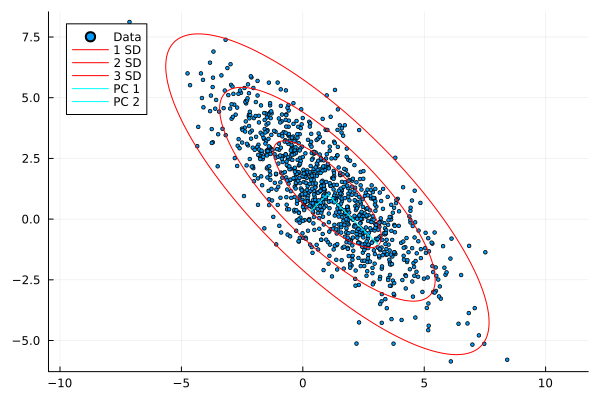

In [871]:
# plot X again
scatter(X[:,1], X[:,2], legend = nothing, aspect_ratio = :equal, label = "Data", ms = 2)

# plot ellipses
plot!(X_mean[1].+X_std[:,1], X_mean[2].+X_std[:,2], label = "1 SD", lc = :red)
plot!(X_mean[1].+2*X_std[:,1], X_mean[2].+2*X_std[:,2], label = "2 SD", lc = :red)
plot!(X_mean[1].+3*X_std[:,1], X_mean[2].+3*X_std[:,2], label = "3 SD", lc = :red)

# scale left singular values and translate; specifically determine the end points
pc_1_end = s[1]*v[:,1]+X_mean'
pc_2_end = s[2]*v[:,2]+X_mean'

# plot principle components
plot!([X_mean[1],pc_1_end[1]],[X_mean[2],pc_1_end[2]], label = "PC 1", lc = :cyan)
plot!([X_mean[1],pc_2_end[1]],[X_mean[2],pc_2_end[2]], label = "PC 2", lc = :cyan)

# include legend
plot!(legend = :topleft)